In [1]:
#Libraries import

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [27]:
#Dataset load

In [28]:
housing = fetch_california_housing(as_frame=True)
df = housing.frame
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [29]:
#EDA (data explore)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.

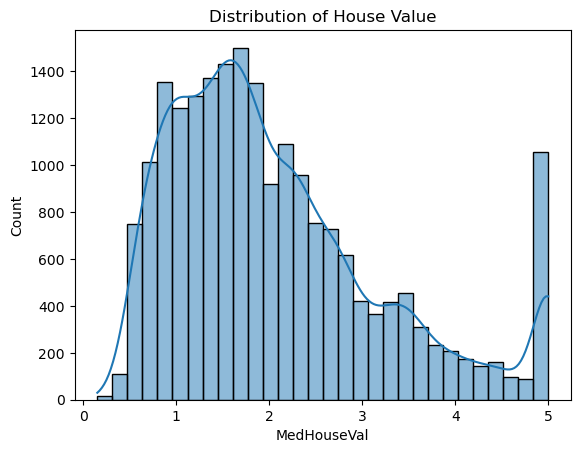

In [30]:
print(df.info())
print(df.describe())

# Target distribution
sns.histplot(df["MedHouseVal"], bins=30, kde=True)
plt.title("Distribution of House Value")
plt.show()

In [31]:
#Features (X) and Target (y)

In [63]:
# X = df.drop(columns=["MedHouseVal"])
# y = df["MedHouseVal"]
X=df.iloc[:,0:8]
y=df.iloc[:,-1]

In [64]:
#Train/Test split

In [65]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.8, random_state=200
)

In [66]:
#Train Linear Regression model

In [67]:
from sklearn.linear_model import LinearRegression

In [68]:
lr = LinearRegression()
lr.fit(X_test, y_test)

LinearRegression()

In [69]:
prediction=lr.predict(X_train)

In [70]:
from sklearn.metrics import r2_score
r2_score(y_train, prediction)

0.6069365171774914

In [73]:
lr.predict([[8.3018,42.0,5.237336,0.991890,350,2.509428,37.84,-122.25]])

C:\Users\seema\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([4.25857726])

In [50]:
print("Intercept:", lr.intercept_)
print("Coefficients:")
for name, coef in zip(X.columns, lr.coef_):
    print(f"{name:10s}: {coef:.4f}")


Intercept: -37.07187699293454
Coefficients:
MedInc    : 0.4397
HouseAge  : 0.0095
AveRooms  : -0.1082
AveBedrms : 0.6447
Population: -0.0000
AveOccup  : -0.0041
Latitude  : -0.4190
Longitude : -0.4348


In [17]:
#Prediction

In [18]:
y_pred = lr.predict(X_test)
print("Some Predictions:", y_pred[:5])


Some Predictions: [1.57094746 2.65964674 2.970135   2.11323636 2.15229959]


In [19]:
#Model Evaluation

In [20]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("RMSE:", rmse)
print("R² Score:", r2)


MAE: 0.5309898808235318
RMSE: 0.7449401232760313
R² Score: 0.5860688992098915


In [21]:
#Residual Analysis

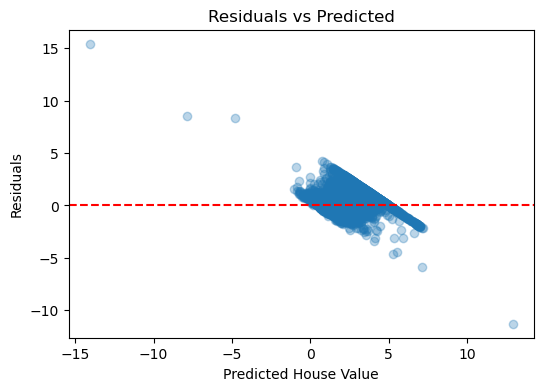

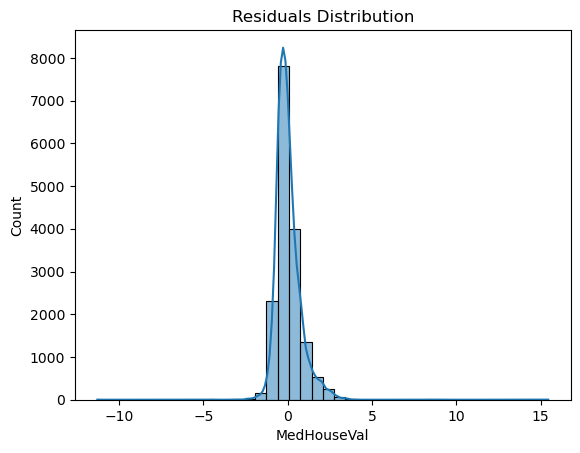

In [22]:
residuals = y_test - y_pred

plt.figure(figsize=(6,4))
plt.scatter(y_pred, residuals, alpha=0.3)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Predicted House Value")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")
plt.show()

# Distribution of residuals
sns.histplot(residuals, bins=40, kde=True)
plt.title("Residuals Distribution")
plt.show()


In [23]:
#Feature Importance Visualization

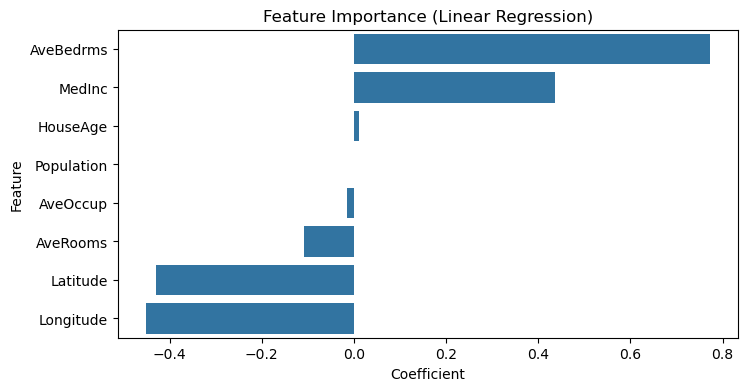

In [24]:
coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": lr.coef_
}).sort_values(by="Coefficient", ascending=False)

plt.figure(figsize=(8,4))
sns.barplot(x="Coefficient", y="Feature", data=coef_df)
plt.title("Feature Importance (Linear Regression)")
plt.show()


In [25]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


<Axes: >

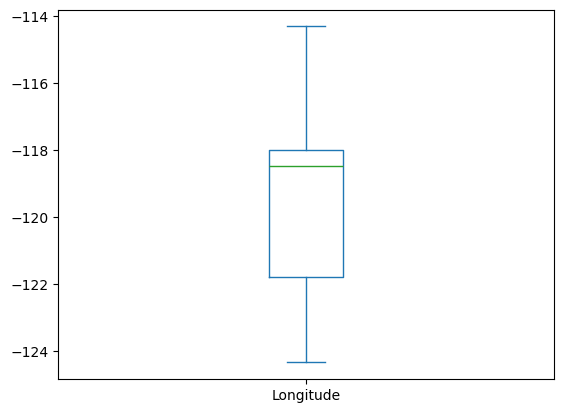

In [42]:
df['Longitude'].plot(kind='box')